In [1]:
# Title: Business Analysis
# Objective: The goal is to create a classification model using synthetic data. This involves importing, analyzing, and visualizing the data,followed by training a model, evaluating its performance, and making predictions.
# Data Source: Generated synthetic data with clear separation between classes.
# Problem Type: Classification

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Step 2: Generate Synthetic Data for Binary Classification
# Generating data that is easier to classify with minimal noise
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2,
                           n_clusters_per_class=1, weights=[0.5, 0.5], flip_y=0, class_sep=2, random_state=42)

# Create a DataFrame for the generated data
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 11)])
df['target'] = y

In [4]:
# Step 3: Describe Data
print("Data Overview:")
print(df.head())  # Show the first few rows of the data
print("\nData Information:")
df.info()  # Information about data types and missing values
print("\nSummary Statistics:")
print(df.describe())  # Summary statistics


Data Overview:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -3.737868  -0.676577  -0.387449   1.350317  -6.694512  -2.955831   
1   0.688834  -1.844027   0.331991  -0.450096   0.798186   0.766445   
2  -2.068926   2.876710   5.585042   3.453118  -4.868774  -2.935938   
3   0.367691  -1.103555  -0.464175  -1.285414  -2.281810  -0.354742   
4  -0.686641   3.326291   4.533850   2.875560  -2.880502  -2.469023   

   feature_7  feature_8  feature_9  feature_10  target  
0   3.044761  -2.709821   2.634503   -0.077370       1  
1   0.392144  -2.981287   2.846433    2.877963       0  
2   1.168337  -2.594815   2.518773    2.438459       1  
3  -2.781454  -2.173399   1.144052    1.557490       0  
4   2.050608  -1.429497   0.651824    0.689799       1  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feat

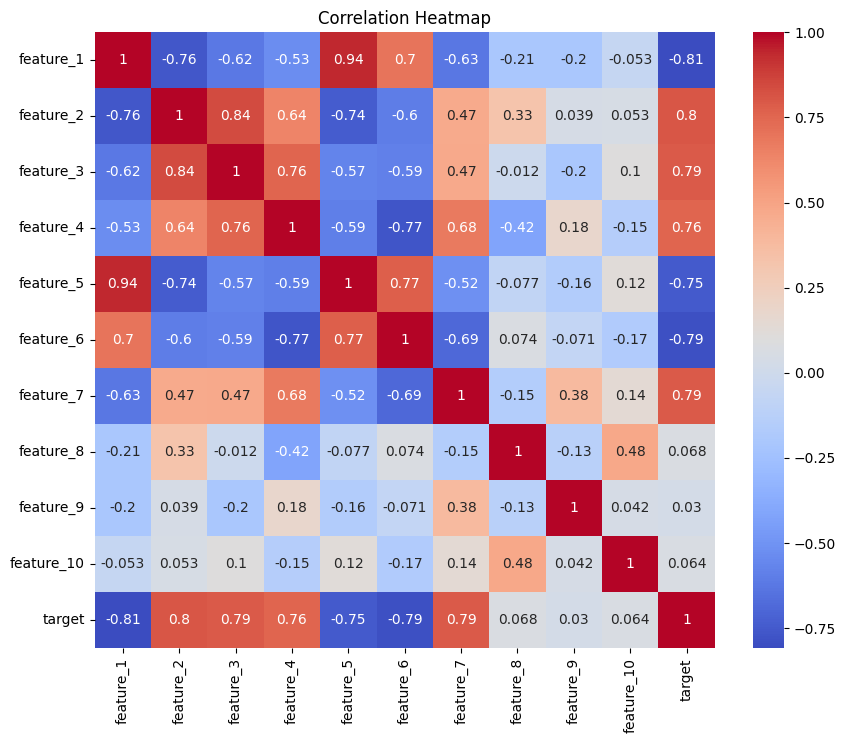

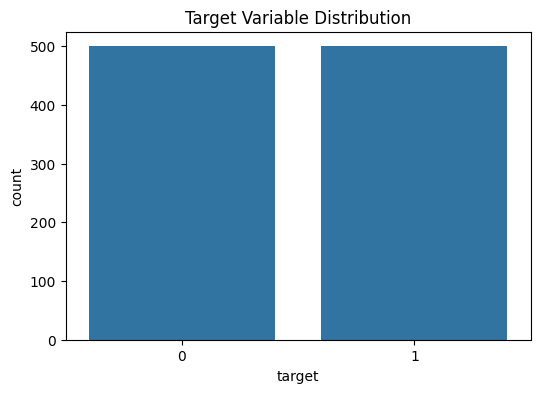

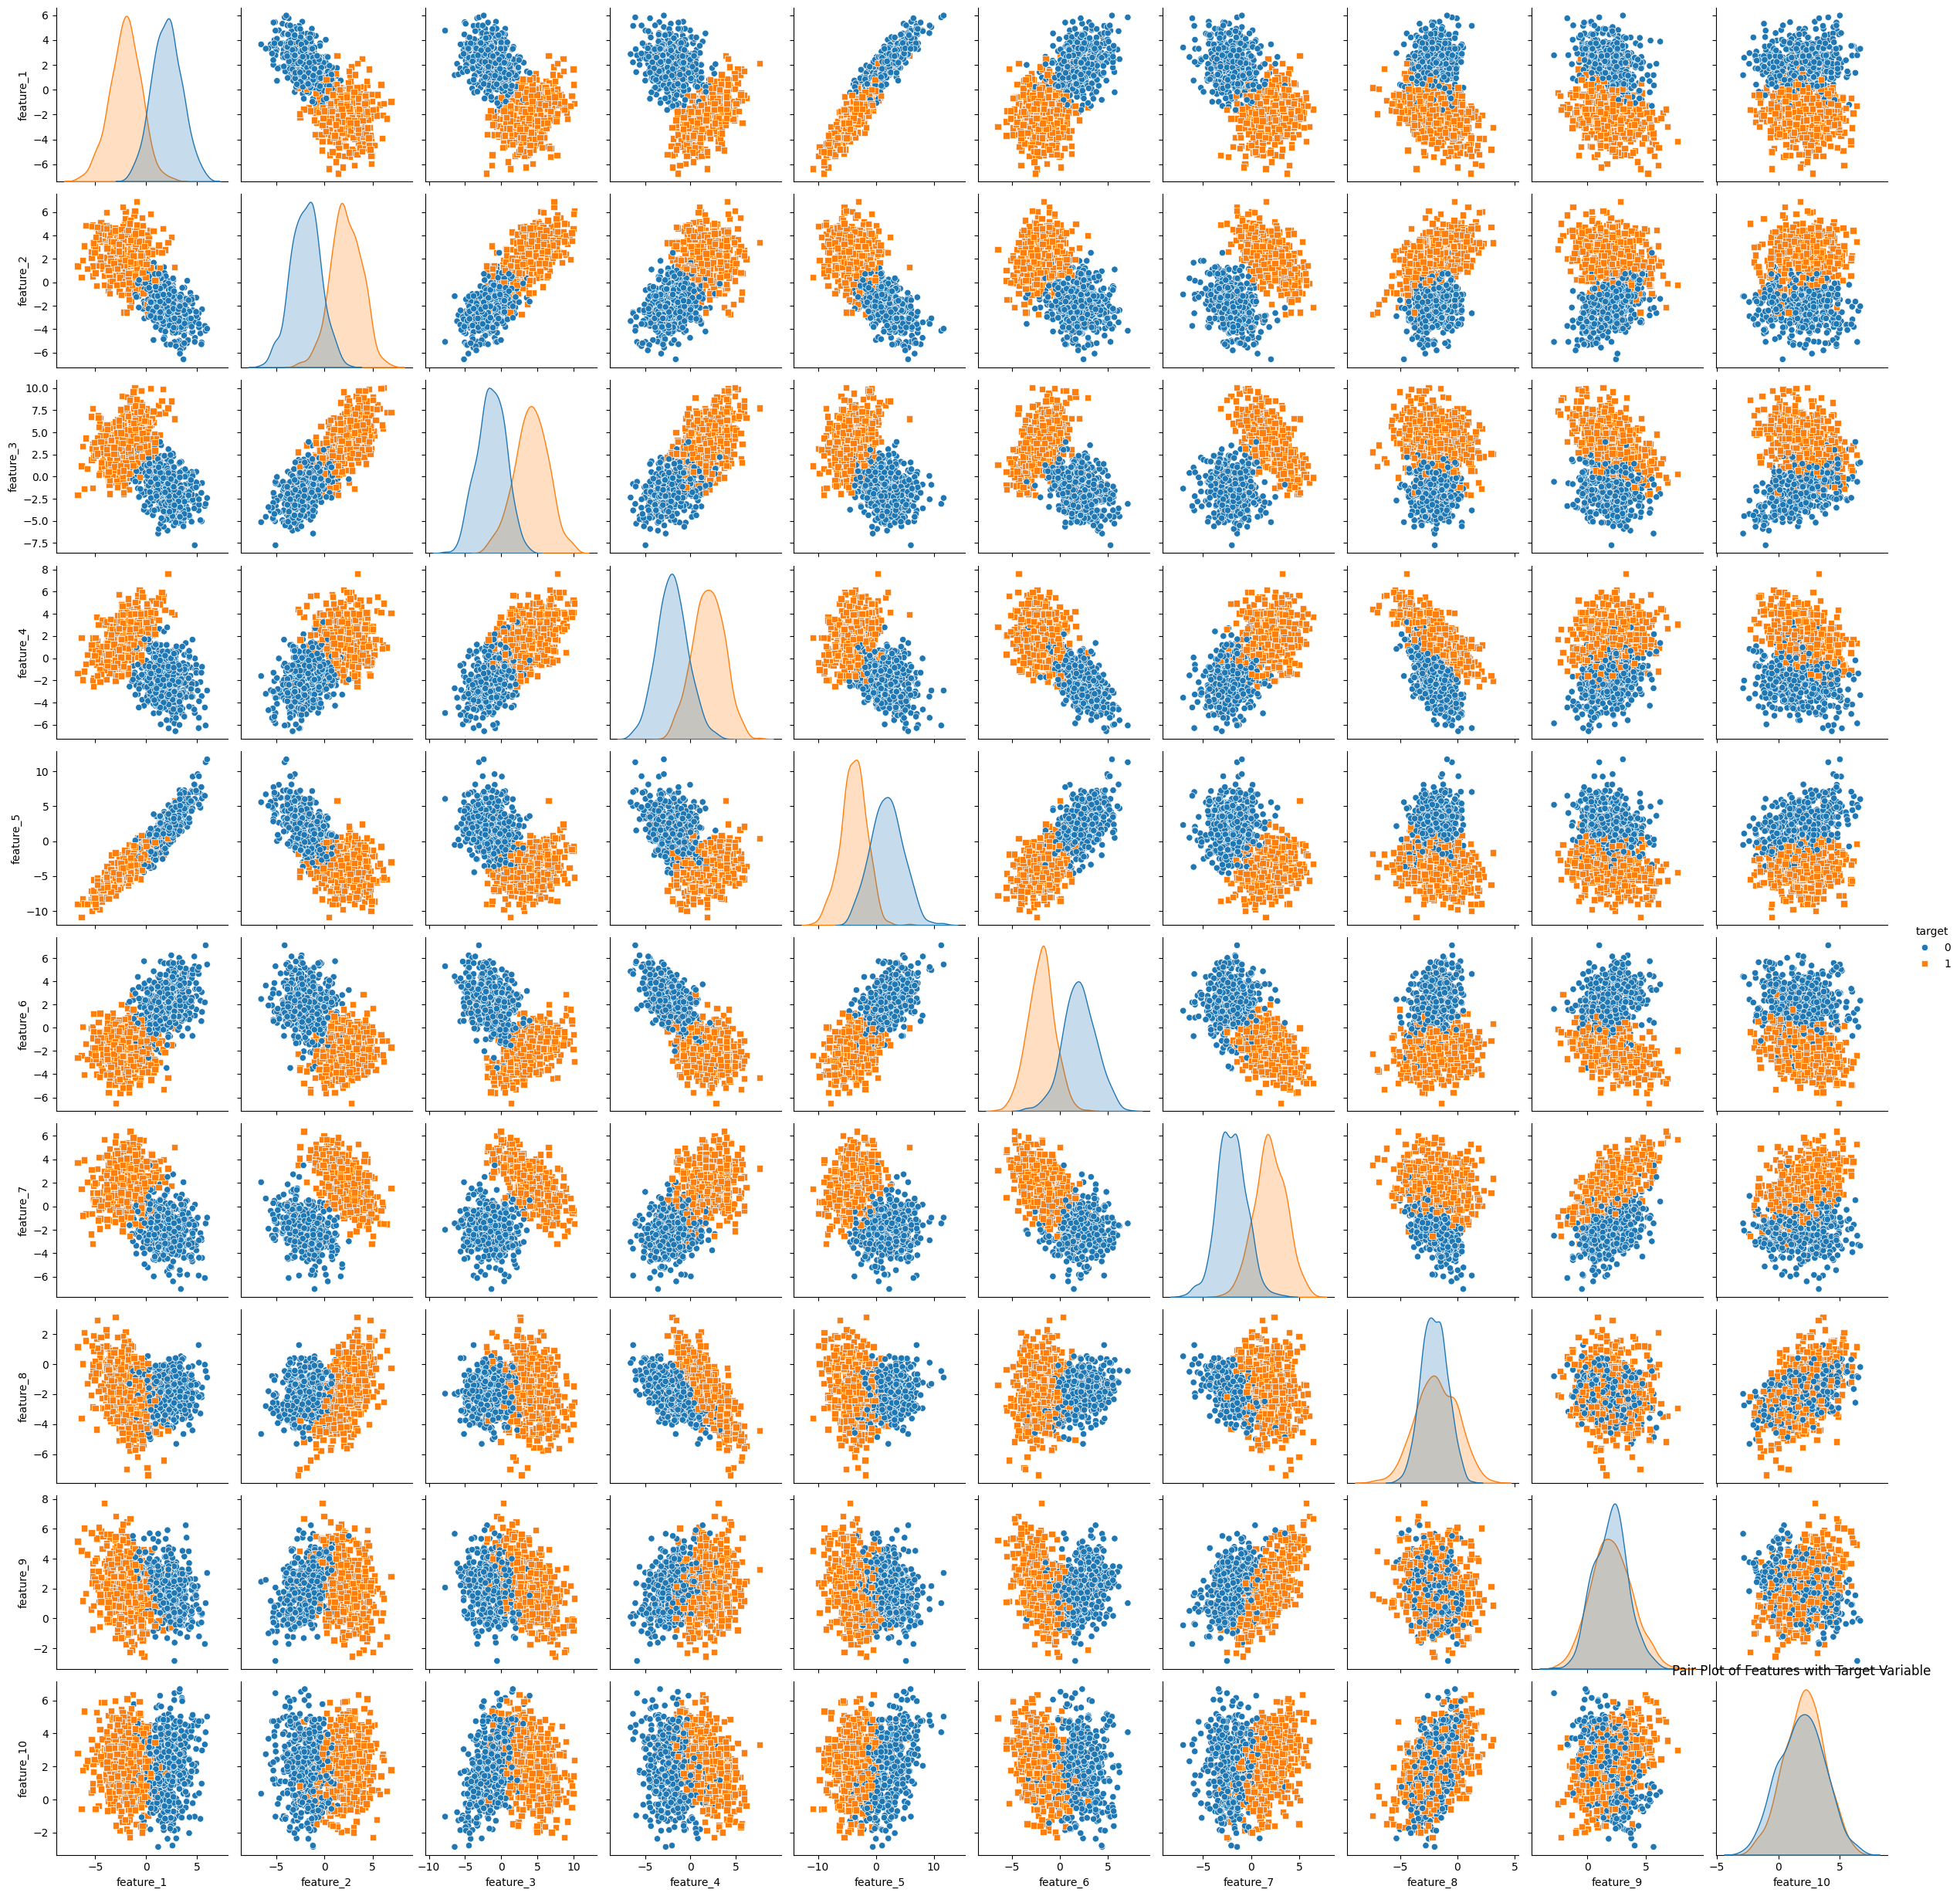

In [5]:
# Step 4: Data Visualization
# Correlation Heatmap to understand relationships between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Visualizing target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.show()

# Pair Plot
sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])
plt.title('Pair Plot of Features with Target Variable')
plt.show()

In [6]:
# Step 5: Data Preprocessing
# No need to encode variables since they are already numeric, but scaling helps for models like Gradient Boosting.

In [7]:
# Step 6: Define Target Variable (y) and Feature Variables (X)
X = df.drop(columns='target')  # Feature variables
y = df['target']  # Target variable

In [8]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 8: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Step 9: Modeling (Gradient Boosting for Classification)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [11]:
# Step 10: Model Evaluation
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.98
Confusion Matrix:
 [[ 93   2]
 [  2 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.98      0.98      0.98       105

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [12]:
# Step 11: Prediction and Explanation
# Example of new unseen data (replace this with actual data)
new_data = pd.DataFrame({
    'feature_1': [0.5, -1.2, 1.1],
    'feature_2': [-0.3, 0.8, -1.5],
    'feature_3': [2.0, 0.5, 1.3],
    'feature_4': [-1.1, -0.4, 0.7],
    'feature_5': [0.9, 1.4, -0.6],
    'feature_6': [1.0, -1.1, 0.2],
    'feature_7': [-0.9, 0.6, -1.7],
    'feature_8': [1.4, -0.7, 1.2],
    'feature_9': [0.2, 1.1, -0.3],
    'feature_10': [-1.2, 0.8, -0.5]
})

# Preprocessing the new data
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
predictions = model.predict(new_data_scaled)
print("Predictions on new data:", predictions)

# Show predicted probabilities for each class
predicted_probabilities = model.predict_proba(new_data_scaled)
print("Predicted Probabilities:\n", predicted_probabilities)

Predictions on new data: [0 1 0]
Predicted Probabilities:
 [[9.99978358e-01 2.16421234e-05]
 [2.20330043e-05 9.99977967e-01]
 [9.99978358e-01 2.16421234e-05]]


#Explanation of Each Step:
#1. Import Libraries: Imports the required libraries for data handling, model building, and visualization.
#2. Generate Synthetic Data: Creates synthetic binary classification data using make_classification with specified features and clear class separation for better accuracy.
#3. Describe Data: Provides an overview of the dataset, including the first few rows, data types, and summary statistics for initial exploration.
#4. Data Visualization: Uses a heatmap, count plot, and pair plot to visualize correlations, class distribution, and relationships between features and the target variable.
#5. Data Preprocessing: Ensures that features are in the correct format and prepares them for model training by scaling numerical values.
#6. Define Target and Features: Separates the dataset into feature variables (X) and the target variable (y).
#7. Train-Test Split: Splits the data into training and testing sets to train the model and evaluate its performance on unseen data.
#8. Feature Scaling: Applies scaling to standardize feature values, which improves the performance of models like Gradient Boosting.
#9. Modeling (Gradient Boosting): Trains a Gradient Boosting Classifier on the scaled training data for high accuracy.
#10. Model Evaluation: Evaluates the model’s accuracy using metrics such as accuracy score, confusion matrix, and classification report on the test set.